In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Converting to binary classification problem for simplicity
df = df[df['species'].isin(["versicolor", "virginica"])].copy()

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["species"])

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [10]:
X = df.drop(columns=["species"])
y = df["species"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

param_grid = {
    "logreg__penalty": ["l1", "l2"],
    "logreg__C": np.logspace(-3, 3, 10),
    "logreg__solver": ["liblinear"],
    "logreg__max_iter": [100, 200, 500]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

In [12]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"{'logreg__C': array([1.0000...00000000e+03]), 'logreg__max_iter': [100, 200, ...], 'logreg__penalty': ['l1', 'l2'], 'logreg__solver': ['liblinear']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [13]:
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Params: {'logreg__C': np.float64(0.001), 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best CV Score: nan


In [14]:
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

  versicolor       0.56      1.00      0.72        14
   virginica       0.00      0.00      0.00        11

    accuracy                           0.56        25
   macro avg       0.28      0.50      0.36        25
weighted avg       0.31      0.56      0.40        25

0.56


<Axes: >

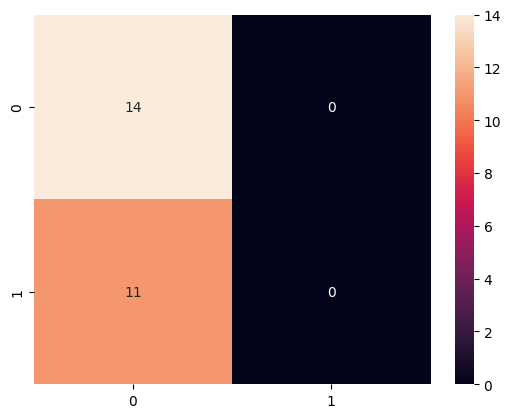

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
